In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')

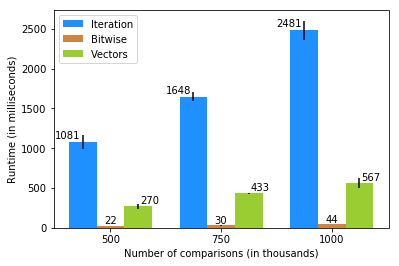

In [3]:
iter_means, iter_std = (1081, 1648, 2481), (85, 55, 122)
bit_means, bit_std = (22, 30, 44), (4, 3, 2)
la_means, la_std = (270, 433, 567), (29, 10, 62)

ind = np.arange(len(iter_means))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, iter_means, width/2, yerr=iter_std,
                color='dodgerblue', label='Iteration')

rects2 = ax.bar(ind, bit_means, width /2, yerr=bit_std,
                color='peru', label='Bitwise')

rects3 = ax.bar(ind + width/2, la_means, width /2, yerr=la_std,
                color='yellowgreen', label='Vectors')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (in milliseconds)')
ax.set_xlabel('Number of comparisons (in thousands)')
ax.set_xticks(ind)
ax.set_xticklabels(('500', '750', '1000'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "center")
autolabel(rects3, "right")

plt.savefig('hd_bench_1.pdf')
plt.show()

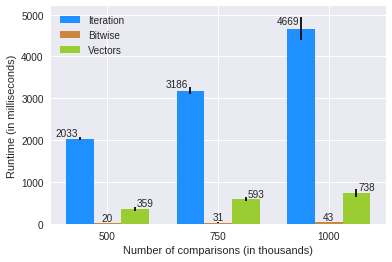

In [6]:
iter_means, iter_std = (2033, 3186, 4669), (31, 91, 282)
bit_means, bit_std = (20, 31, 43), (2, 2, 6)
la_means, la_std = (359, 593, 738), (42, 54, 90)

ind = np.arange(len(iter_means))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, iter_means, width/2, yerr=iter_std,
                color='dodgerblue', label='Iteration')

rects2 = ax.bar(ind, bit_means, width /2, yerr=bit_std,
                color='peru', label='Bitwise')

rects3 = ax.bar(ind + width/2, la_means, width /2, yerr=la_std,
                color='yellowgreen', label='Vectors')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (in milliseconds)')
ax.set_xlabel('Number of comparisons (in thousands)')
ax.set_xticks(ind)
ax.set_xticklabels(('500', '750', '1000'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "center")
autolabel(rects3, "right")

plt.savefig('hd_bench_2.pdf')
plt.show()

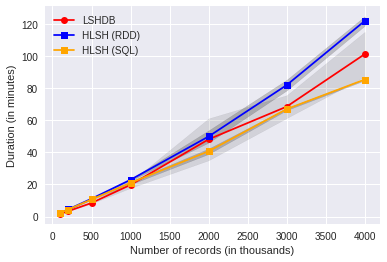

In [14]:
std = pd.DataFrame({
    'LSHDB': [0.091, 0.029, 0.317, 1.882, 13.038, 7.114, 13.912],
    'HLSH (RDD)': [0.1066, 0.1664, 0.2528, 0.4679, 3.8060, 3.325, 2.969],
    'HLSH (SQL)': [0.1066, 0.1694, 0.3984, 0.9611, 1.6924, 0.6670, 0.5248]
})

df = pd.DataFrame({
    'LSHDB': [1.767, 3.358, 8.504, 19.754, 48.104, 68.450, 101.117],
    'HLSH (RDD)': [2.263, 4.492, 11.117, 22.938, 49.871, 81.85, 121.763],
    'HLSH (SQL)': [2.271, 4.417, 10.7, 21.004, 40.683, 66.913, 85.317],
    'x': [100, 200, 500, 1000, 2000, 3000, 4000],
})
 
plt.plot('x', 'LSHDB', data=df, marker='o', color='red')
plt.fill_between(df['x'], df['LSHDB'] - std['LSHDB'], df['LSHDB'] + std['LSHDB'], color='k', alpha=.10)

plt.plot('x', 'HLSH (RDD)', data=df, marker='s', color='blue')
plt.fill_between(df['x'], df['HLSH (RDD)'] - std['HLSH (RDD)'], df['HLSH (RDD)'] + std['HLSH (RDD)'], color='k', alpha=.2)

plt.plot('x', 'HLSH (SQL)', data=df, marker='s', color='orange')
plt.fill_between(df['x'], df['HLSH (SQL)'] - std['HLSH (SQL)'], df['HLSH (SQL)'] + std['HLSH (SQL)'], color='k', alpha=.2)

plt.xlabel('Number of records (in thousands)')
plt.ylabel('Duration (in minutes)')

plt.legend()
plt.savefig('HLSH_Single_Node.pdf')
plt.show()

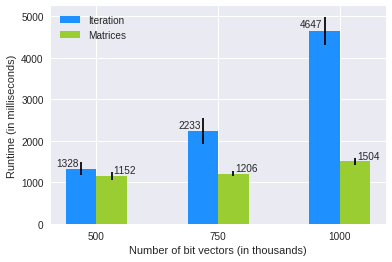

In [9]:
iter_means, iter_std = (1328, 2233, 4647), (158, 315, 340)
la_means, la_std = (1152, 1206, 1504), (102, 60, 86)

ind = np.arange(len(iter_means))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, iter_means, width, yerr=iter_std,
                color='dodgerblue', label='Iteration')

rects2 = ax.bar(ind + width / 2, la_means, width, yerr=la_std,
                color='yellowgreen', label='Matrices')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (in milliseconds)')
ax.set_xlabel('Number of bit vectors (in thousands)')
ax.set_xticks(ind)
ax.set_xticklabels(('500', '750', '1000'))
ax.legend(loc='upper left')

autolabel(rects1, "left")
autolabel(rects2, "right")

plt.savefig('LSH_Bench_1.pdf')
plt.show()

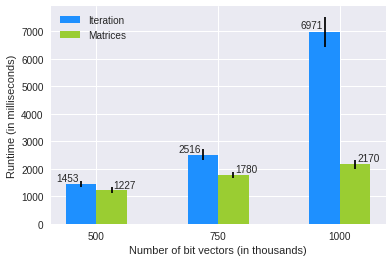

In [10]:
iter_means, iter_std = (1453, 2516, 6971), (116, 204, 554)
la_means, la_std = (1227, 1780, 2170), (93, 115, 164)

ind = np.arange(len(iter_means))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, iter_means, width, yerr=iter_std,
                color='dodgerblue', label='Iteration')

rects2 = ax.bar(ind + width / 2, la_means, width, yerr=la_std,
                color='yellowgreen', label='Matrices')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime (in milliseconds)')
ax.set_xlabel('Number of bit vectors (in thousands)')
ax.set_xticks(ind)
ax.set_xticklabels(('500', '750', '1000'))
ax.legend(loc='upper left')

autolabel(rects1, "left")
autolabel(rects2, "right")

plt.savefig('LSH_Bench_2.pdf')
plt.show()

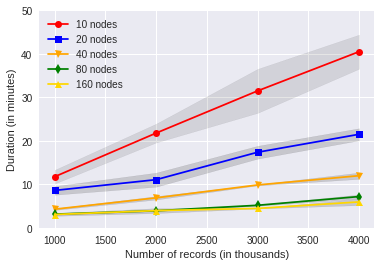

In [22]:
std = pd.DataFrame({
    '10 nodes': [1.575, 2.163, 5.059, 3.922],
    '20 nodes': [0.995, 1.616, 1.474, 1.391],
    '40 nodes': [0.172, 0.391, 0.104, 0.730],
    '80 nodes': [0.155, 0.085, 0.131, 0.475],
    '160 nodes': [0.306, 0.565, 0.039, 0.727]
})

df = pd.DataFrame({
    '10 nodes': [11.750, 21.783, 31.483, 40.496],
    '20 nodes': [8.592, 11.067, 17.375, 21.500],
    '40 nodes': [4.279, 6.888, 9.854, 11.979],
    '80 nodes': [3.142, 3.921, 5.175, 7.183],
    '160 nodes': [3.058, 3.954, 4.463, 5.950],
    'x': [1000, 2000, 3000, 4000],
})
 
plt.plot('x', '10 nodes', data=df, marker='o', color='red')
plt.fill_between(df['x'], df['10 nodes'] - std['10 nodes'], df['10 nodes'] + std['10 nodes'], color='k', alpha=.1)

plt.plot('x', '20 nodes', data=df, marker='s', color='blue')
plt.fill_between(df['x'], df['20 nodes'] - std['20 nodes'], df['20 nodes'] + std['20 nodes'], color='k', alpha=.15)

plt.plot('x', '40 nodes', data=df, marker='v', color='orange')
plt.fill_between(df['x'], df['40 nodes'] - std['40 nodes'], df['40 nodes'] + std['40 nodes'], color='k', alpha=.15)

plt.plot('x', '80 nodes', data=df, marker='d', color='green')
plt.fill_between(df['x'], df['80 nodes'] - std['80 nodes'], df['80 nodes'] + std['80 nodes'], color='k', alpha=.15)

plt.plot('x', '160 nodes', data=df, marker='^', color='gold')
plt.fill_between(df['x'], df['160 nodes'] - std['160 nodes'], df['160 nodes'] + std['160 nodes'], color='k', alpha=.15)

plt.xlabel('Number of records (in thousands)')
plt.ylabel('Duration (in minutes)')

ax = plt.gca()
ax.set_ylim([0, 50])

plt.legend()
plt.savefig('HLSH_RDD_Cluster.pdf')
plt.show()

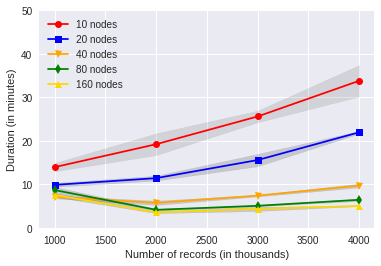

In [21]:
std = pd.DataFrame({
    '10 nodes': [0.961, 2.495, 1.336, 3.615],
    '20 nodes': [0.444, 0.554, 1.416, 0.289],
    '40 nodes': [0.324, 0.501, 0.185, 0.436],
    '80 nodes': [0.730, 0.252, 0.124, 0.270],
    '160 nodes': [0.409, 0.170, 0.483, 0.048]
})

df = pd.DataFrame({
    '10 nodes': [13.950, 19.217, 25.596, 33.792],
    '20 nodes': [9.871, 11.417, 15.575, 21.950],
    '40 nodes': [7.096, 5.738, 7.396, 9.708],
    '80 nodes': [8.675, 4.133, 5.063, 6.438],
    '160 nodes': [7.550, 3.529, 4.346, 5.029],
    'x': [1000, 2000, 3000, 4000],
})
 
plt.plot('x', '10 nodes', data=df, marker='o', color='red')
plt.fill_between(df['x'], df['10 nodes'] - std['10 nodes'], df['10 nodes'] + std['10 nodes'], color='k', alpha=.1)

plt.plot('x', '20 nodes', data=df, marker='s', color='blue')
plt.fill_between(df['x'], df['20 nodes'] - std['20 nodes'], df['20 nodes'] + std['20 nodes'], color='k', alpha=.15)

plt.plot('x', '40 nodes', data=df, marker='v', color='orange')
plt.fill_between(df['x'], df['40 nodes'] - std['40 nodes'], df['40 nodes'] + std['40 nodes'], color='k', alpha=.15)

plt.plot('x', '80 nodes', data=df, marker='d', color='green')
plt.fill_between(df['x'], df['80 nodes'] - std['80 nodes'], df['80 nodes'] + std['80 nodes'], color='k', alpha=.15)

plt.plot('x', '160 nodes', data=df, marker='^', color='gold')
plt.fill_between(df['x'], df['160 nodes'] - std['160 nodes'], df['160 nodes'] + std['160 nodes'], color='k', alpha=.15)

plt.xlabel('Number of records (in thousands)')
plt.ylabel('Duration (in minutes)')

ax = plt.gca()
ax.set_ylim([0, 50])

plt.legend()
plt.savefig('HLSH_SQL_Cluster.pdf')
plt.show()

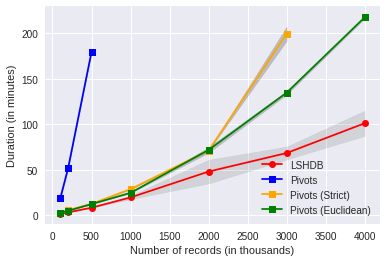

In [6]:
std = pd.DataFrame({
    'LSHDB': [0.091, 0.029, 0.317, 1.882, 13.038, 7.114, 13.912],
    'Pivots': [0.6789, 1.3170, 0.9781, None, None, None, None],
    'Pivots (Strict)': [0.075, 0.240, 0.154, 0.396, 0.356, 7.833, None],
    'Pivots (Euclidean)': [0.189, 0.071, 0.200, 0.306, 3.005, 2.051, 1.202]
})

df = pd.DataFrame({
    'LSHDB': [1.767, 3.358, 8.504, 19.754, 48.104, 68.450, 101.117],
    'Pivots': [18.896, 51.733, 179.338, None, None, None, None],
    'Pivots (Strict)': [2.658, 5.721, 12.746, 28.900, 71.200, 199.346, None],
    'Pivots (Euclidean)': [3.167, 5.133, 12.425, 24.8, 71.825, 134.6, 217.3],
    'x': [100, 200, 500, 1000, 2000, 3000, 4000],
})
 
plt.plot('x', 'LSHDB', data=df, marker='o', color='red')
plt.fill_between(df['x'], df['LSHDB'] - std['LSHDB'], df['LSHDB'] + std['LSHDB'], color='k', alpha=.10)

plt.plot('x', 'Pivots', data=df, marker='s', color='blue')
plt.fill_between(df['x'], df['Pivots'] - std['Pivots'], df['Pivots'] + std['Pivots'], color='k', alpha=.2)

plt.plot('x', 'Pivots (Strict)', data=df, marker='s', color='orange')
plt.fill_between(df['x'], df['Pivots (Strict)'] - std['Pivots (Strict)'], df['Pivots (Strict)'] + std['Pivots (Strict)'], color='k', alpha=.2)

plt.plot('x', 'Pivots (Euclidean)', data=df, marker='s', color='green')
plt.fill_between(df['x'], df['Pivots (Euclidean)'] - std['Pivots (Euclidean)'], df['Pivots (Euclidean)'] + std['Pivots (Euclidean)'], color='k', alpha=.2)

plt.xlabel('Number of records (in thousands)')
plt.ylabel('Duration (in minutes)')

plt.legend()
plt.savefig('Pivots_Single_Node.pdf')
plt.show()